In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so

# abbreviation for plotting functions in certain range
def plot(f, xRange, *args, **kw):
    yRange = np.fromiter(map(f,xRange), np.float)
    plt.plot(xRange,yRange, *args, **kw)

data was generated with reaction A + B -> C, with rate 0.05 and timestep 0.01 

In [2]:
data = np.load("generate/dtraj.npy").T

In [3]:
data.shape

(3, 50001)

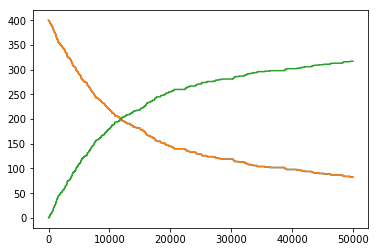

In [4]:
plt.plot(data[0], label="A")
plt.plot(data[1], label="B")
plt.plot(data[2], label="C")

Choose ansatz functions for A+B->C and C->A+B

In [5]:
def theta1(data):
    result = np.zeros_like(data)
    result[0] = -data[0]*data[1]
    result[1] = -data[0]*data[1]
    result[2] = data[0]*data[1]
    return result

def theta2(data):
    return -1.*theta1(data)

In [6]:
def time_derivative(data):
    #result = np.gradient(data, axis=1).T
    result = np.diff(data).T
    return result/0.01

print(time_derivative(data).shape)

(50000, 3)


In [7]:
derivative = time_derivative(data)
data = data[:,:-1]
theta = np.array([theta1(data), theta2(data), np.zeros_like(data)])
theta = np.transpose(theta, axes=(2, 1, 0))

print(theta.shape)
print(derivative.shape)

(50000, 3, 3)
(50000, 3)


In [8]:
print(theta)

[[[-160000.  160000.       0.]
  [-160000.  160000.       0.]
  [ 160000. -160000.       0.]]

 [[-160000.  160000.       0.]
  [-160000.  160000.       0.]
  [ 160000. -160000.       0.]]

 [[-160000.  160000.       0.]
  [-160000.  160000.       0.]
  [ 160000. -160000.       0.]]

 ..., 
 [[  -6889.    6889.       0.]
  [  -6889.    6889.       0.]
  [   6889.   -6889.       0.]]

 [[  -6889.    6889.       0.]
  [  -6889.    6889.       0.]
  [   6889.   -6889.       0.]]

 [[  -6889.    6889.       0.]
  [  -6889.    6889.       0.]
  [   6889.   -6889.       0.]]]


In [9]:
def residual(xi, theta, derivative):
    result = derivative - np.matmul(theta, xi)
    #result = result*result
    result = np.sum(result, axis=1)
    #result = np.sqrt(result)
    return result

np.unique(residual(np.array([0.5,0.5,0.5]), theta, derivative), return_counts=True)

(array([-200., -100.,    0.]), array([    4,   309, 49687]))

In [12]:
so.least_squares(lambda x: residual(x, theta, derivative), np.array([0.05,0.5,0.01]), xtol=1e-15, ftol=1e-15)

 active_mask: array([ 0.,  0.,  0.])
        cost: 1604401.6701612317
         fun: array([ 3.10597333,  3.10597333,  3.10597333, ...,  0.13373156,
        0.13373156,  0.13373156])
        grad: array([ 0.14592603,  1.13317204,  0.        ])
         jac: array([[ 159999.99979944, -160000.0006959 ,       0.        ],
       [ 159999.99979944, -160000.0006959 ,       0.        ],
       [ 159999.99979944, -160000.0006959 ,       0.        ],
       ..., 
       [   6888.99998117,   -6888.99995666,       0.        ],
       [   6888.99998117,   -6888.99995666,       0.        ],
       [   6888.99998117,   -6888.99995666,       0.        ]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 30
        njev: 5
  optimality: 1.1331720445305109
      status: 3
     success: True
           x: array([ 1.25531533,  1.25529592,  0.01      ])